In [ ]:
!pip3 install twilio

In [3]:
import os
from twilio.rest import Client
from twilio_config import TWILIO_ACCOUNT_SID, TWILIO_AUTH_TOKEN, PHONE_NUMBER, API_KEY_WAPI
import time

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

In [6]:
from datetime import datetime

# URL construction

In [7]:
city = 'Tampico'
api_key = API_KEY_WAPI
url_weather = 'http://api.weatherapi.com/v1/forecast.json?key='+api_key+'&q='+city+'&days=1&aqi=no&alerts=no'

In [8]:
response = requests.get(url_weather).json()
response

{'location': {'name': 'Tampico',
  'region': 'Tamaulipas',
  'country': 'Mexico',
  'lat': 22.26,
  'lon': -97.87,
  'tz_id': 'America/Monterrey',
  'localtime_epoch': 1684517026,
  'localtime': '2023-05-19 11:23'},
 'current': {'last_updated_epoch': 1684516500,
  'last_updated': '2023-05-19 11:15',
  'temp_c': 31.0,
  'temp_f': 87.8,
  'is_day': 1,
  'condition': {'text': 'Partly cloudy',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png',
   'code': 1003},
  'wind_mph': 6.9,
  'wind_kph': 11.2,
  'wind_degree': 10,
  'wind_dir': 'N',
  'pressure_mb': 1016.0,
  'pressure_in': 29.99,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 66,
  'cloud': 75,
  'feelslike_c': 37.9,
  'feelslike_f': 100.3,
  'vis_km': 13.0,
  'vis_miles': 8.0,
  'uv': 7.0,
  'gust_mph': 9.2,
  'gust_kph': 14.8},
 'forecast': {'forecastday': [{'date': '2023-05-19',
    'date_epoch': 1684454400,
    'day': {'maxtemp_c': 32.1,
     'maxtemp_f': 89.8,
     'mintemp_c': 25.4,
     'mintemp_f': 77.7,
   

# JSON exploration

In [9]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [10]:
response['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

In [11]:
len(response['forecast']['forecastday'][0]['hour']) # 0 - 23 (hours of the day)

24

In [12]:
response['forecast']['forecastday'][0]['hour'][0]['time'].split()[0] # Date

'2023-05-19'

In [13]:
int(response['forecast']['forecastday'][0]['hour'][0]['time'].split()[1].split(':')[0]) # Hour

0

In [14]:
response['forecast']['forecastday'][0]['hour'][0]['condition']['text'] # Weather condition

'Clear'

In [15]:
response['forecast']['forecastday'][0]['hour'][0]['temp_c'] # Temperature in celsius

26.3

In [16]:
response['forecast']['forecastday'][0]['hour'][0]['will_it_rain'] # 0 = false, 1 = true

0

In [17]:
response['forecast']['forecastday'][0]['hour'][0]['chance_of_rain'] # Probability of rain

0

# Dataframe construction

In [18]:
# Función para extraer los campos de los 24 registros (24 hrs del dia)

def get_forecast(response, i) :
    
    date = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
    hour = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
    condition = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
    temperature = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
    rain = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
    rain_prob = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
    
    return date, hour, condition, temperature, rain, rain_prob

In [19]:
datos = []

for i in tqdm(range(len(response['forecast']['forecastday'][0]['hour'])), colour = 'green') : # 0 - 23
    
    datos.append(get_forecast(response, i))

100%|██████████| 24/24 [00:00<00:00, 19546.27it/s]


In [20]:
datos

[('2023-05-19', 0, 'Clear', 26.3, 0, 0),
 ('2023-05-19', 1, 'Clear', 26.2, 0, 0),
 ('2023-05-19', 2, 'Clear', 26.0, 0, 0),
 ('2023-05-19', 3, 'Clear', 25.9, 0, 0),
 ('2023-05-19', 4, 'Clear', 25.8, 0, 0),
 ('2023-05-19', 5, 'Partly cloudy', 25.6, 0, 0),
 ('2023-05-19', 6, 'Partly cloudy', 25.6, 0, 0),
 ('2023-05-19', 7, 'Sunny', 25.4, 0, 0),
 ('2023-05-19', 8, 'Partly cloudy', 25.9, 0, 0),
 ('2023-05-19', 9, 'Partly cloudy', 26.9, 0, 0),
 ('2023-05-19', 10, 'Patchy rain possible', 27.8, 1, 89),
 ('2023-05-19', 11, 'Partly cloudy', 29.5, 0, 0),
 ('2023-05-19', 12, 'Partly cloudy', 29.0, 0, 0),
 ('2023-05-19', 13, 'Patchy rain possible', 30.0, 0, 70),
 ('2023-05-19', 14, 'Partly cloudy', 28.9, 0, 0),
 ('2023-05-19', 15, 'Sunny', 29.9, 0, 0),
 ('2023-05-19', 16, 'Sunny', 32.1, 0, 0),
 ('2023-05-19', 17, 'Sunny', 30.9, 0, 0),
 ('2023-05-19', 18, 'Sunny', 29.8, 0, 0),
 ('2023-05-19', 19, 'Sunny', 28.5, 0, 0),
 ('2023-05-19', 20, 'Partly cloudy', 27.2, 0, 0),
 ('2023-05-19', 21, 'Clear', 26.

In [21]:
col = ['date', 'hour', 'condition', 'temperature', 'rain', 'rain_prob']
df = pd.DataFrame(datos, columns=col)
df

,date,hour,condition,temperature,rain,rain_prob
0,2023-05-19,0,Clear,26.3,0,0
1,2023-05-19,1,Clear,26.2,0,0
2,2023-05-19,2,Clear,26.0,0,0
3,2023-05-19,3,Clear,25.9,0,0
4,2023-05-19,4,Clear,25.8,0,0
5,2023-05-19,5,Partly cloudy,25.6,0,0
6,2023-05-19,6,Partly cloudy,25.6,0,0
7,2023-05-19,7,Sunny,25.4,0,0
8,2023-05-19,8,Partly cloudy,25.9,0,0
9,2023-05-19,9,Partly cloudy,26.9,0,0


In [23]:
# Filtrar solamente las horas en las que hay probabilidad de lluvia

df_rain = df[(df['rain']==1)]
df_rain = df_rain[['hour','condition']]
df_rain.set_index('hour', inplace=True)
df_rain

,condition
hour,
10,Patchy rain possible


# SMS Message from Twilio

In [25]:
# https://www.twilio.com/es-mx/docs/sms/tutorials/how-to-send-sms-messages-python

account_sid = TWILIO_ACCOUNT_SID
auth_token = TWILIO_AUTH_TOKEN
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='\nHola!\n\nEl pronóstico de lluvia el día de hoy '+df['date'][0]+' en '+city+' es: \n\n'+str(df_rain),
         from_= PHONE_NUMBER,
         to='InsertYourCellPhoneNumber'
     )

print('Mensaje enviado exitosamente ' + message.sid)

Mensaje enviado exitosamente SM25dd84b320a97ebbc00a67930d915fec


# Notification

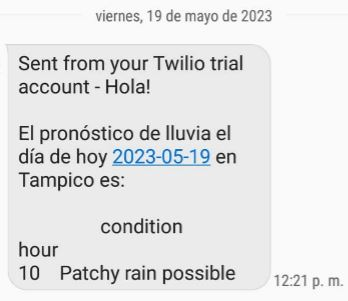